# Ultralytics & Fiftyone: YOLOv5 Training and Inference

In [2]:
# Suppress Ultralytics logging
import os; os.environ["YOLO_VERBOSE"] = "False"

import fiftyone as fo
import fiftyone.zoo as foz
import fiftyone.utils.ultralytics as fou

from ultralytics import YOLO

# Load an example dataset
dataset = foz.load_zoo_dataset("quickstart", max_samples=25)
dataset.select_fields().keep_fields()

Migrating database to v0.23.8
 100% |████|  187.5Mb/187.5Mb [443.0ms elapsed, 0s remaining, 423.3Mb/s]      
Extracting dataset...
Parsing dataset metadata
Found 200 samples
Dataset info written to '/home/strickvl/fiftyone/quickstart/info.json'
Loading 'quickstart'
 100% |███████████████████| 25/25 [132.0ms elapsed, 0s remaining, 190.8 samples/s]    
Dataset 'quickstart-25' created


In [ ]:
# YOLOv8
model = YOLO("yolov8s.pt")
# model = YOLO("yolov8m.pt")
# model = YOLO("yolov8l.pt")
# model = YOLO("yolov8x.pt")

# YOLOv5
# model = YOLO("yolov5s.pt")
# model = YOLO("yolov5m.pt")
# model = YOLO("yolov5l.pt")
# model = YOLO("yolov5x.pt")

# YOLOv9
# model = YOLO("yolov9c.pt")
# model = YOLO("yolov9e.pt")

dataset.apply_model(model, label_field="boxes")

session = fo.launch_app(dataset)

In [4]:
for sample in dataset.iter_samples(progress=True):
    result = model(sample.filepath)[0]
    sample["boxes"] = fou.to_detections(result)
    sample.save()

 100% |███████████████████| 25/25 [246.4ms elapsed, 0s remaining, 101.5 samples/s]     


In [5]:
sample

<Sample: {
    'id': '66274bab431e9d625bae8433',
    'media_type': 'image',
    'filepath': '/home/strickvl/fiftyone/quickstart/data/000773.jpg',
    'tags': ['validation'],
    'metadata': None,
    'boxes': <Detections: {
        'detections': [
            <Detection: {
                'id': '66274c6b431e9d625bae84e2',
                'attributes': {},
                'tags': [],
                'label': 'dog',
                'bounding_box': [
                    0.34100817143917084,
                    0.41812171041965485,
                    0.4287475645542145,
                    0.3426543176174164,
                ],
                'mask': None,
                'confidence': 0.9282082915306091,
                'index': None,
            }>,
            <Detection: {
                'id': '66274c6b431e9d625bae84e3',
                'attributes': {},
                'tags': [],
                'label': 'dog',
                'bounding_box': [
                    0.21329393982887

In [ ]:
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["detections"],
    classes=["cat", "dog"],
    max_samples=25,
    dataset_name="coco-2017-validation-cats-dogs-detections",
)

session = fo.launch_app(dataset)

In [25]:
dataset.apply_model(model, label_field="boxes")

 100% |███████████████████| 25/25 [381.8ms elapsed, 0s remaining, 65.5 samples/s]      



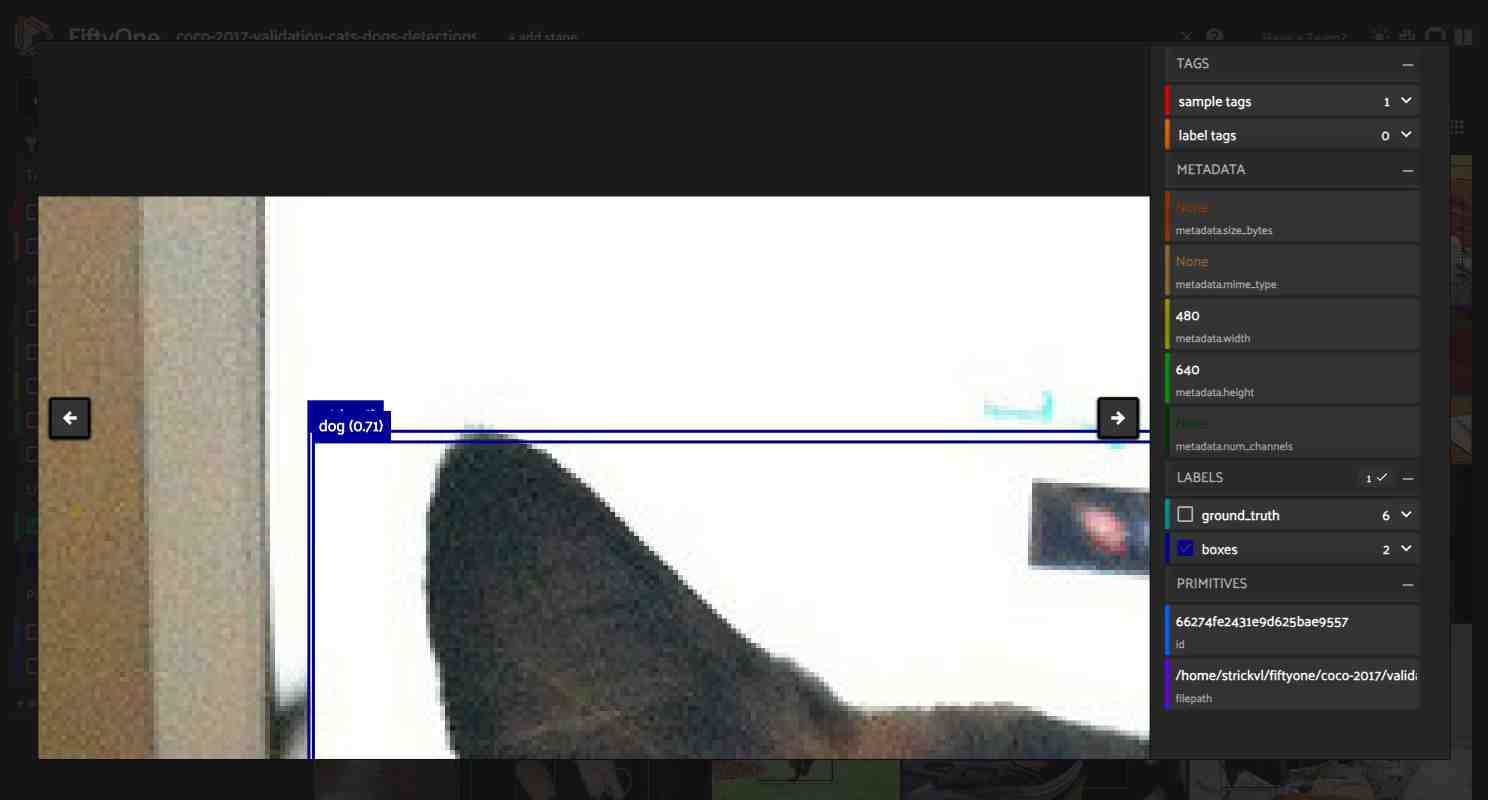

In [27]:
session = fo.launch_app(dataset)

In [28]:
# convert the detections to FiftyOne format

for sample in dataset.iter_samples(progress=True):
    result = model(sample.filepath)[0]
    sample["boxes"] = fou.to_detections(result)
    sample.save()

 100% |███████████████████| 25/25 [281.6ms elapsed, 0s remaining, 88.8 samples/s]      


In [30]:
# see supported ultralytics models
from rich import print
print(foz.list_zoo_models(tags="yolo"))

[
    'yolo-nas-torch',
    'yolov5l-coco-torch',
    'yolov5m-coco-torch',
    'yolov5n-coco-torch',
    'yolov5s-coco-torch',
    'yolov5x-coco-torch',
    'yolov8l-coco-torch',
    'yolov8l-obb-dotav1-torch',
    'yolov8l-seg-coco-torch',
    'yolov8l-world-torch',
    'yolov8m-coco-torch',
    'yolov8m-obb-dotav1-torch',
    'yolov8m-seg-coco-torch',
    'yolov8m-world-torch',
    'yolov8n-coco-torch',
    'yolov8n-obb-dotav1-torch',
    'yolov8n-seg-coco-torch',
    'yolov8s-coco-torch',
    'yolov8s-obb-dotav1-torch',
    'yolov8s-seg-coco-torch',
    'yolov8s-world-torch',
    'yolov8x-coco-torch',
    'yolov8x-obb-dotav1-torch',
    'yolov8x-seg-coco-torch',
    'yolov8x-world-torch',
    'yolov9c-coco-torch',
    'yolov9c-seg-coco-torch',
    'yolov9e-coco-torch',
    'yolov9e-seg-coco-torch'
]

 100% |███████████████████| 15/15 [11.9ms elapsed, 0s remaining, 1.3K samples/s]     
 100% |███████████████████| 15/15 [11.9ms elapsed, 0s remaining, 1.3K samples/s]     



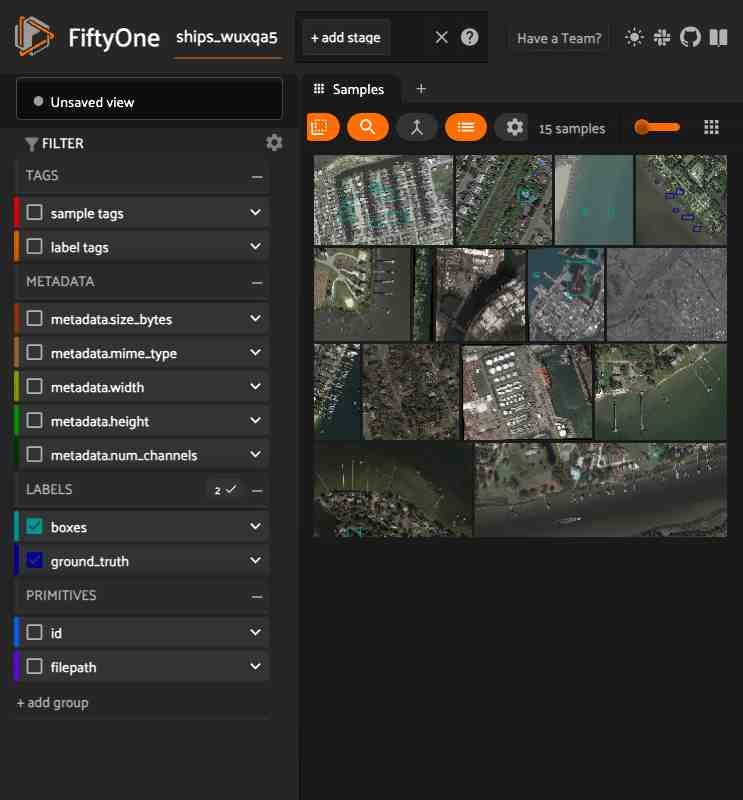

In [26]:
import fiftyone as fo
import os
from zenml.client import Client
os.environ["FIFTYONE_LABELSTUDIO_API_KEY"] = "9896fa7abd15277ab9046842469fe3c2ec17e0bb"

artifact = Client().get_artifact_version('603c0941-67f4-4be1-9d6f-114cf5c879ac')
dataset_json = artifact.load()
dataset = fo.Dataset.from_json(dataset_json, persistent=True)
session = fo.launch_app(dataset)


In [19]:
session.dataset.name

'ships_wuxqa5'

In [28]:
fo.load_dataset("ships_wuxqa5").list_annotation_runs()



['arst', 'huge', 'something_123']

In [29]:
import fiftyone as fo

anno_key = "huge"

# Step 5: Merge annotations back into FiftyOne dataset

new_dataset = fo.load_dataset(session.dataset.name).load_annotations(anno_key)

# Load the view that was annotated in the App
# view = dataset.load_annotation_view(anno_key)
session = fo.launch_app(new_dataset)


Download complete
Download complete
Loading labels for field 'ground_truth'...
Loading labels for field 'ground_truth'...
 100% |█████████████████████| 1/1 [10.2ms elapsed, 0s remaining, 98.4 samples/s] 
 100% |█████████████████████| 1/1 [10.2ms elapsed, 0s remaining, 98.4 samples/s] 


In [7]:
from rich import inspect
inspect(dataset)

╭───────────────────────────── <class 'fiftyone.core.dataset.Dataset'> ──────────────────────────────╮
│ A FiftyOne dataset.                                                                                │
│                                                                                                    │
│ ╭────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ Name:        ships_lc6skf                                                                      │ │
│ │ Media type:  image                                                                             │ │
│ │ Num samples: 15                                                                                │ │
│ │ Persistent:  False                                                                             │ │
│ │ Tags:        []                                                                                │ │
│ │ Sample fields:                                                                                 │ │
│ │ │   id:       fiftyone.core.fields.ObjectIdField                                               │ │
│ │ │   filepath: fiftyone.core.fields.StringField                                                 │ │
│ │ │   tags:     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)                 │ │
│ │ │   metadata: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata) │ │
│ │ │   boxes:    fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)      │ │
│ ╰────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                    │
│           app_config = <DatasetAppConfig: {                                                        │
│                            'media_fields': ['filepath'],                                           │
│                            'grid_media_field': 'filepath',                                         │
│                            'modal_media_field': 'filepath',                                        │
│                            'sidebar_mode': None,                                                   │
│                            'sidebar_groups': None,                                                 │
│                            'color_scheme': None,                                                   │
│                            'plugins': {},                                                          │
│                        }>                                                                          │
│              classes = {}                                                                          │
│           created_at = datetime.datetime(2024, 4, 23, 11, 14, 15, 551000)                          │
│      default_classes = []                                                                          │
│  default_group_slice = None                                                                        │
│ default_mask_targets = {}                                                                          │
│     default_skeleton = None                                                                        │
│              deleted = False                                                                       │
│          description = None                                                                        │
│          group_field = None                                                                        │
│    group_media_types = None                                                                        │
│          group_slice = None                                                                        │
│         group_slices = None                                                                        │
│  has_annotation_runs = False                                                        